In [67]:
import numpy as np
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import *
import math
import cartopy
from cartopy import crs as ccrs, feature as cfeature
import cartopy.io.img_tiles as cimgt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy.stats import gaussian_kde
from scipy.interpolate import interpn
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.io.img_tiles import OSM
from cartopy.io import shapereader
import geopandas
import mplleaflet
import contextily as ctx
import folium
from geojson import FeatureCollection, Feature, Polygon
from shapely.geometry import LineString, MultiPolygon, MultiPoint, Point
import geopandas as gpd

In [2]:
df = pd.read_csv('CTA_-_System_Information_-_List_of__L__Stops.csv')

In [3]:
df

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,30106,S,Wilson (95th-bound),Wilson,Wilson (Red & Purple Lines),40540,True,True,False,False,False,False,False,False,False,False,"(41.964273, -87.657588)"
296,30383,N,Washington/Wabash (Outer Loop),Washington/Wabash,"Washington/Wabash (Brown, Green, Orange, Purpl...",41700,True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)"
297,30385,S,Wilson (Loop-bound),Wilson,Wilson (Red & Purple Lines),40540,True,False,False,False,False,False,True,False,False,False,"(41.964273, -87.657588)"
298,30033,W,Ashland (Harlem-54th/Cermak-bound),Ashland,Ashland (Green & Pink Lines),40170,True,False,False,True,False,False,False,False,True,False,"(41.885269, -87.666969)"


In [4]:
lats = list(map(lambda x: float(x.split(',')[0][1:]),df.Location))
long = list(map(lambda x: float(x.split(',')[1][1:-1]),df.Location))

In [5]:
df['lats'] = lats
df['long'] = long

In [6]:
df = df.drop('Location',axis = 1)

In [7]:
df.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,lats,long
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,41.857908,-87.669147
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,41.857908,-87.669147
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,41.829353,-87.680622
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,41.829353,-87.680622
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,41.831677,-87.625826


In [8]:
df.to_csv('Stop_data.csv')

In [9]:
df_red = df[df.RED]
df_green = df[df.G]

In [10]:
points = df[['long','lats']]

In [11]:
vor = Voronoi(points)

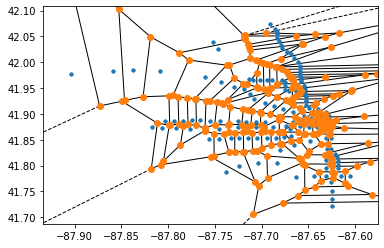

<Figure size 21600x21600 with 0 Axes>

In [12]:
fig = voronoi_plot_2d(vor)
plt.figure(figsize=(300,300))
plt.show()

In [13]:
token = "pk.eyJ1Ijoic2hvcDRuYXZvIiwiYSI6ImNrNGMwNWQ2YTBqMjgzbnFueHR6b2JtNW0ifQ.wIm4tsZXTTaNBWLnNLFftQ"
tileurl = 'https://api.mapbox.com/v4/mapbox.satellite/{z}/{x}/{y}@2x.png?access_token=' + token
fmap = folium.Map(location=[41.8,-87.7], zoom_start=9, tiles=tileurl, attr='Mapbox')

In [14]:
## works with a df which has a lat and a long column
## creates a CircleMarker object and places it centered at each point 
## pass in the name of a file and a folium map, and the CircleMarkers are added to the 
## folium map 
def add_points(fmap,df):
    for i in range(df.shape[0]):
        folium.CircleMarker(
            location=[df.lats.iloc[i], df.long.iloc[i]],
            radius=2,
            popup=' ',
            color='#3186cc',
            fill=True,
            fill_color='#FF0000'
        ).add_to(fmap)

In [15]:
add_points(fmap,df)

In [16]:
fmap

In [35]:
points = df[['long','lats']]
vor = Voronoi(points)

In [36]:
len(vor.regions)

145

In [37]:
points.shape

(300, 2)

In [38]:
vor.max_bound

array([-87.605857,  42.073153])

In [52]:
vorJSON = open('libVor.json', 'w')
point_voronoi_list = []
feature_list = []
poly_list = []
for region in range(len(vor.regions)-1):
#for region in range(9):    
    vertex_list = []
    for x in vor.regions[region]:
        #Not sure how to map the "infinite" point, so, leave off those regions for now:
        if x == -1:
            break;
        else:
            #Get the vertex out of the list, and flip the order for folium:
            vertex = vor.vertices[x]
            vertex = (vertex[1], vertex[0])
        vertex_list.append(vertex)
    #Save the vertex list as a polygon and then add to the feature_list:
    polygon = Polygon([vertex_list])
    poly_list.append(polygon)
    feature = Feature(geometry=polygon, properties={})
    feature_list.append(feature)
feature_collection = FeatureCollection(feature_list)
print (feature_collection, file=vorJSON)
vorJSON.close()

In [53]:
folium.GeoJson(
    'libVor.json',
    name='geojson'
).add_to(fmap)

In [68]:
gdf = gpd.GeoDataFrame.from_features(feature_collection.__geo_interface__['features'])

ValueError: A LinearRing must have at least 3 coordinate tuples

In [62]:
df = geopandas.GeoDataFrame(geometry=poly_list)

In [64]:
df

ValueError: A LinearRing must have at least 3 coordinate tuples

ValueError: A LinearRing must have at least 3 coordinate tuples

In [48]:
def poly_to_geopandas(polys, columns):
    """
    Converts a GeoViews Paths or Polygons type to a geopandas dataframe.

    Parameters
    ----------

    polys : gv.Path or gv.Polygons
        GeoViews element
    columns: list(str)
        List of columns

    Returns
    -------
    gdf : Geopandas dataframe
    """
    rows = []
    for g in polys.geom():
        rows.append(dict({c: '' for c in columns}, geometry=g))
    return gpd.GeoDataFrame(rows, columns=columns+['geometry']) 

In [42]:
fmap

In [34]:
#Write the features to the new file:
feature_collection = FeatureCollection(feature_list)
print(feature_collection, file=vorJSON)
vorJSON.close()

ValueError: I/O operation on closed file.

In [25]:
count = 0
for poly in poly_list:
    if len(poly_list[count][0]) < 1:
        del(poly_list[count])
    else:
        count+=1

In [26]:
len(poly_list)

140

In [23]:
count = 0
for poly in poly_list:
    if len(poly) > 1 :
        folium.Polygon(
                locations=poly,
                color='#3186cc',
                fill=True,
                fill_color='#FF0000'
            ).add_to(fmap)

In [24]:
count = 0
for poly in poly_list:
    if len(poly) == 1:
        count+=1
print(count)

144


In [30]:
len(vor.regions)

145

In [22]:
fmap

In [32]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """Reconstruct infinite Voronoi regions in a
    2D diagram to finite regions.
    Source:
    [https://stackoverflow.com/a/20678647/1595060](https://stackoverflow.com/a/20678647/1595060)
    """
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")
    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()
    # Construct a map containing all ridges for a
    # given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points,
                                  vor.ridge_vertices):
        all_ridges.setdefault(
            p1, []).append((p2, v1, v2))
        all_ridges.setdefault(
            p2, []).append((p1, v1, v2))
    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]
        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue
        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue
            # Compute the missing endpoint of an
            # infinite ridge
            t = vor.points[p2] - \
                vor.points[p1]  # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal
            midpoint = vor.points[[p1, p2]]. \
                mean(axis=0)
            direction = np.sign(
                np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + \
                direction * radius
            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())
        # Sort region counterclockwise.
        vs = np.asarray([new_vertices[v]
                         for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(
            vs[:, 1] - c[1], vs[:, 0] - c[0])
        new_region = np.array(new_region)[
            np.argsort(angles)]
        new_regions.append(new_region.tolist())
    return new_regions, np.asarray(new_vertices)

In [33]:
def to_ae(df):
    crs = ccrs.PlateCarree()

    # This can be converted into a `proj4` string/dict compatible with GeoPandas
    crs_proj4 = crs.proj4_init
    return df.to_crs(crs_proj4)

In [34]:
gdf = geopandas.GeoDataFrame(geometry=poly_list)
gdf.crs = {'init' :'epsg:6454'}

TypeError: Input must be valid geometry objects: [[[42.219066, -87.912878], [41.915419, -87.873315]]]